In [2]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = iris["data"][:, 3:]    # the width of the petal
y = (iris["target"] == 2).astype(np.int)    # true if label is virginica, false otherwise

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

1.5와 2.0 사이에서 두 클래스의 결정 경계가 형성되고, 두 그래프의 교점을 기준으로 오른쪽에 있는 데이터는 Iris Virginica로 분류될 확률이 높다.

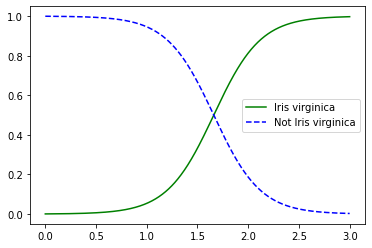

In [7]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

이제 softmax 분류기를 이용해 데이터넷 내의 모든 꽃들을 구분해보자.

In [8]:
X = iris["data"][:, (2, 3)]    # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

In [9]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [10]:
softmax_reg.predict([[5, 2]])

array([2])

In [11]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])